#  NSRDB and WTK Data Slicing

This notebook demonstrates data slicing for the National Renewable Energy Laboratory (NREL) National Solar Radiation Database (NSRDB) data. The data is provided from Amazon Web Services using the HDF Group's Highly Scalable Data Service (HSDS). These slicing methods would also work with the WIND Toolkit data available via HSDS at /nrel/wtk/

For this to work you must first install h5pyd:

```
pip install --user h5pyd
```

Next you'll need to configure HSDS:

```
hsconfigure
```

and enter at the prompt:

```
hs_endpoint = https://developer.nrel.gov/api/hsds
hs_username = None
hs_password = None
hs_api_key = 3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf
```

*The example API key here is for demonstation and is rate-limited per IP. To get your own API key, visit https://developer.nrel.gov/signup/*

You can also add the above contents to a configuration file at ~/.hscfg

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../bin')
from functions import HSDS

path = '/nrel/nsrdb/v3/nsrdb_2017.h5'
nsrdb = HSDS(path, preload=True)

# Extract time-series

In [10]:
# Please provide coordinates of interest (latitude, longitude)
coords = (38.885083, -77.024739)  # NREL DC office

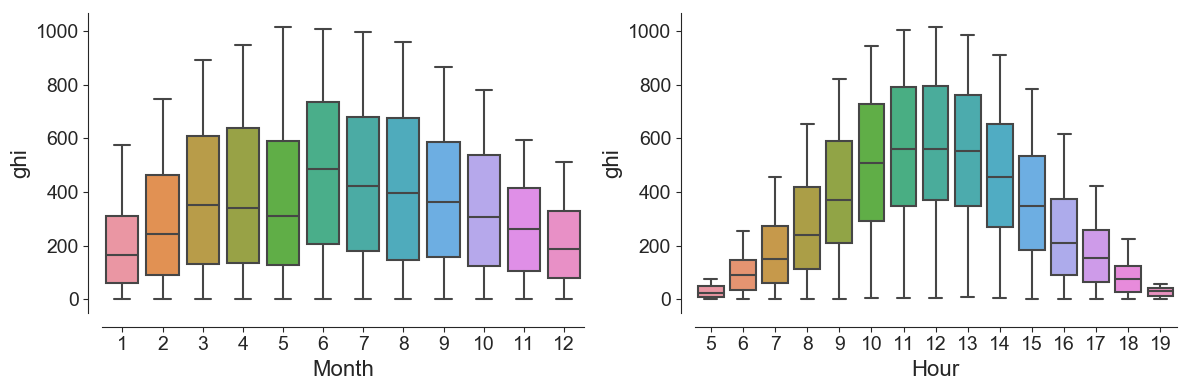

In [11]:
nsrdb_ts = nsrdb.get_timeseries('ghi', coords)
# Remove night-time
nsrdb_ts = nsrdb_ts.loc[nsrdb_ts['ghi'] != 0]
nsrdb.create_boxplots(nsrdb_ts, 'ghi')

# Extract time-step

In [8]:
# Please pick a day in 2017
datetime = '2017-06-17 18:00:00'

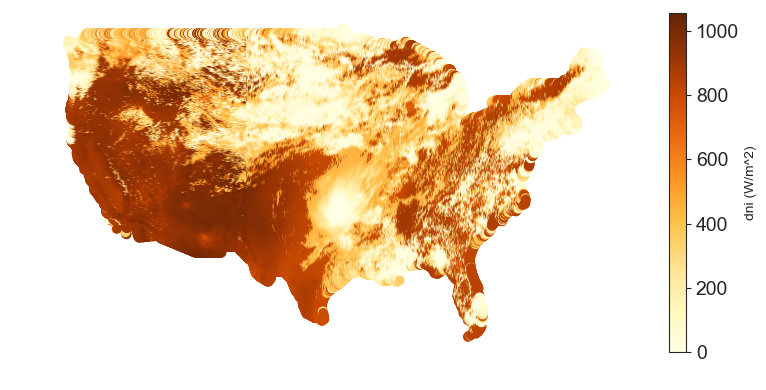

In [9]:
nsrdb_map = nsrdb.get_timestep('dni', datetime)
nsrdb.create_scatter(nsrdb_map, 'dni', cbar_label='dni (W/m^2)',
                     cmap='YlOrBr')